In [1]:
import pandas as pd

# Path to the dataset
file_path = r"C:\Users\18082\Desktop\Healthcare_analysis\healthcare_dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [2]:
# General information
data.info()

# Statistical summary
data.describe()

# Check for missing values
print("Missing Values Per Column:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
# Check unique values in categorical columns
for col in ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type']:
    print(f"{col} unique values:\n", data[col].value_counts(), "\n")

# Explore numerical columns
print("Age Statistics:\n", data['Age'].describe())
print("Billing Amount Statistics:\n", data['Billing Amount'].describe())


Gender unique values:
 Gender
Male      27774
Female    27726
Name: count, dtype: int64 

Blood Type unique values:
 Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64 

Medical Condition unique values:
 Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64 

Admission Type unique values:
 Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64 

Age Statistics:
 count    55500.000000
mean        51.539459
std         19.602454
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64
Billing Amount Statistics:
 count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      5

In [8]:
# Replace missing values in critical columns with a default value or drop rows
data['Blood Type'] = data['Blood Type'].fillna('Unknown') # Replace missing blood types


data.dropna(subset=['Age', 'Gender', 'Medical Condition'], inplace=True)  # Drop rows with critical missing values

# Verify missing values are handled
print("Missing Values After Cleaning:\n", data.isnull().sum())


Missing Values After Cleaning:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [9]:
# Standardize names and text data
data['Name'] = data['Name'].str.title()
data['Doctor'] = data['Doctor'].str.title()
data['Hospital'] = data['Hospital'].str.title()

# Remove extra whitespace
data['Medical Condition'] = data['Medical Condition'].str.strip()


In [10]:
# Convert admission and discharge dates
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'], errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date of Admission', 'Discharge Date'], inplace=True)

# Create a new column for the length of stay
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days


In [11]:
# Check and drop duplicate rows
print("Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Duplicate Rows: 534


In [12]:
cleaned_file_path = r"C:\Users\18082\Desktop\Healthcare_analysis\cleaned_healthcare_dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print("Cleaned data saved at:", cleaned_file_path)


Cleaned data saved at: C:\Users\18082\Desktop\Healthcare_analysis\cleaned_healthcare_dataset.csv


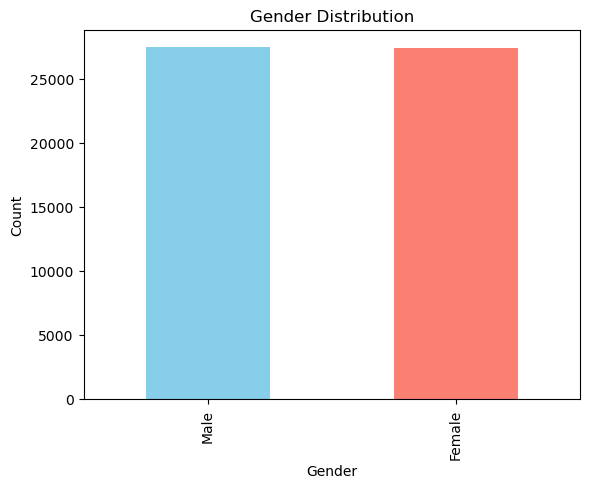

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution bar plot
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'], title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


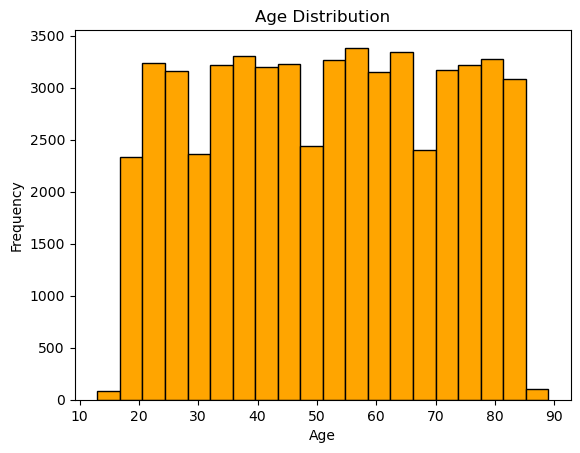

In [14]:
# Age distribution histogram
data['Age'].plot(kind='hist', bins=20, color='orange', edgecolor='black', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


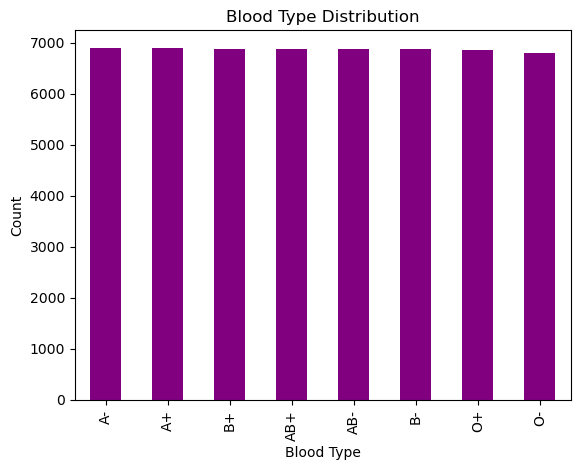

In [15]:
# Blood type bar chart
blood_type_counts = data['Blood Type'].value_counts()
blood_type_counts.plot(kind='bar', color='purple', title='Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()


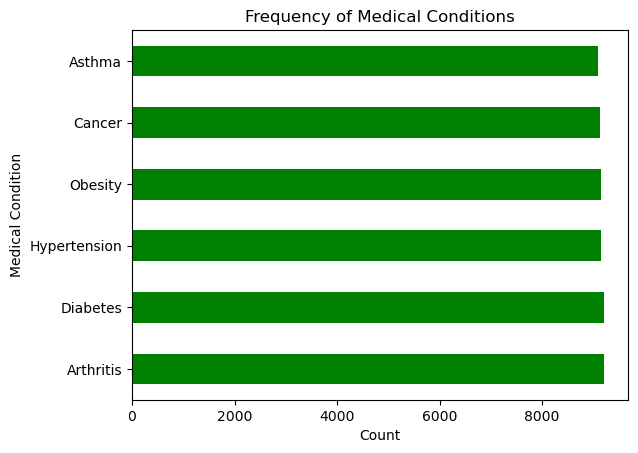

In [16]:
# Bar chart for medical conditions
medical_condition_counts = data['Medical Condition'].value_counts()
medical_condition_counts.plot(kind='barh', color='green', title='Frequency of Medical Conditions')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()


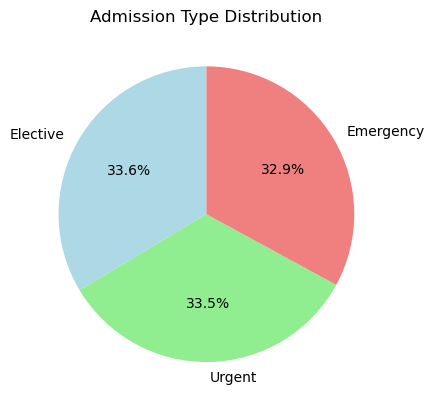

In [17]:
# Pie chart for admission types
admission_type_counts = data['Admission Type'].value_counts()
admission_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'], title='Admission Type Distribution')
plt.ylabel('')
plt.show()


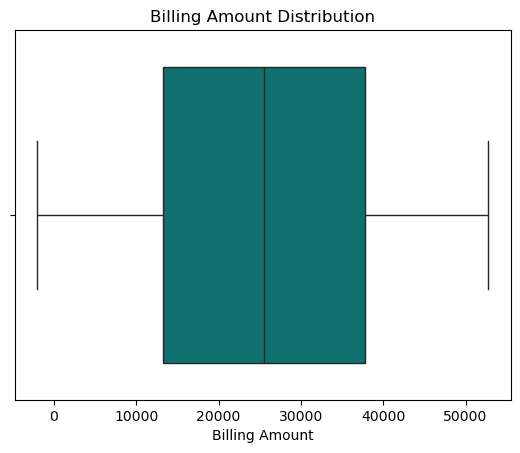

In [18]:
# Boxplot for billing amount
sns.boxplot(x=data['Billing Amount'], color='teal')
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.show()


C:\Users\18082\AppData\Local\Temp\ipykernel_18164\1864622313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Admission Type', y='Billing Amount', data=data, palette='Set2')


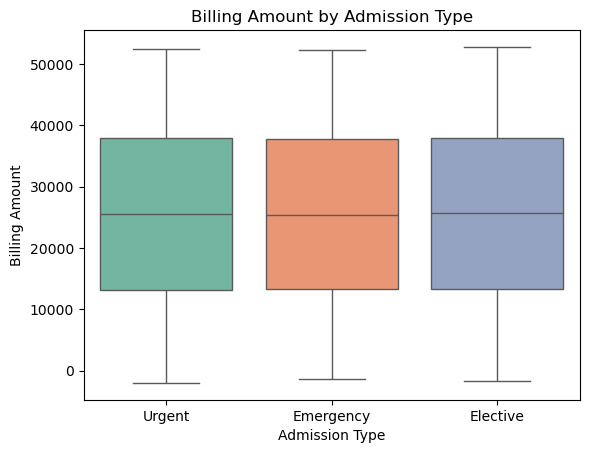

In [19]:
# Boxplot for billing amount by admission type
sns.boxplot(x='Admission Type', y='Billing Amount', data=data, palette='Set2')
plt.title('Billing Amount by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()


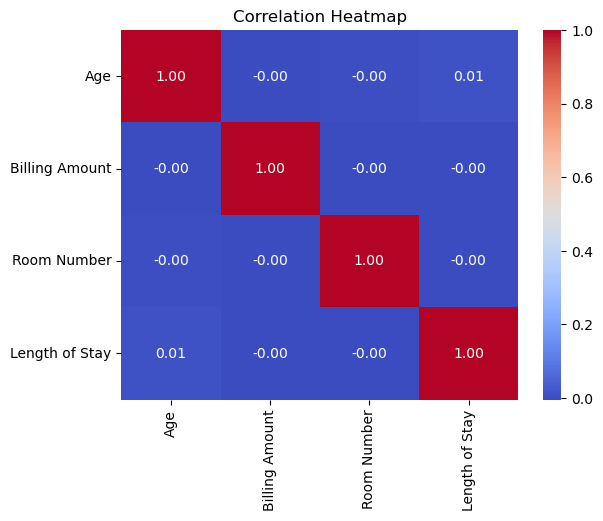

In [21]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute and visualize the correlation matrix
corr_matrix = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


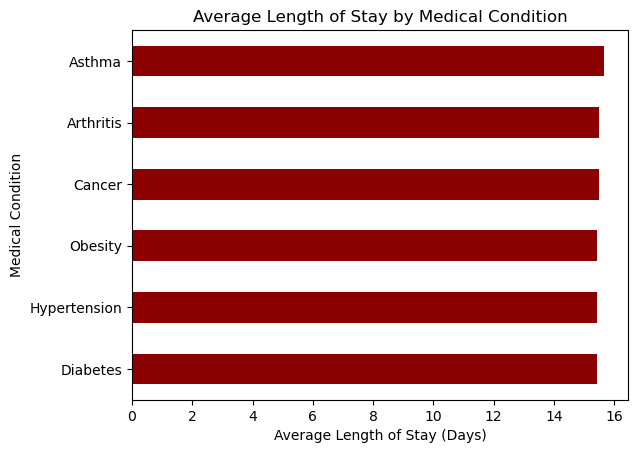

In [22]:
# Length of stay by medical condition
avg_length_of_stay = data.groupby('Medical Condition')['Length of Stay'].mean().sort_values()
avg_length_of_stay.plot(kind='barh', color='darkred', title='Average Length of Stay by Medical Condition')
plt.xlabel('Average Length of Stay (Days)')
plt.ylabel('Medical Condition')
plt.show()
